# Diabetes Prediction with Logistic Regression and Random Forest

This notebook analyzes the Pima Indians Diabetes dataset using two machine learning models: Logistic Regression and Random Forest. It includes:
- Data cleaning and preprocessing
- Model training and evaluation
- ROC curve analysis
- Feature importance visualization

Dataset Source: [Pima Indians Diabetes Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)


GitHub Repository Link: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Dataset Overview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Coun

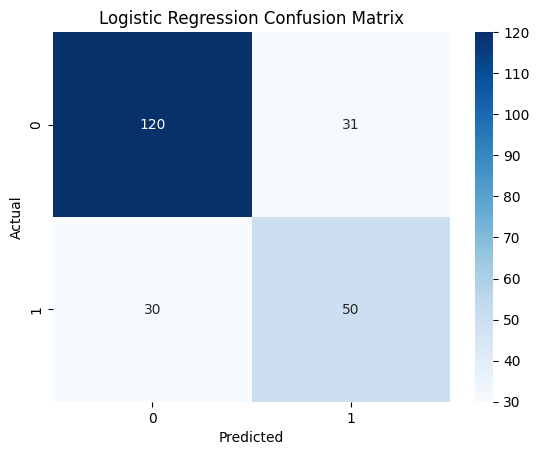

--- Random Forest Evaluation ---
Accuracy: 0.76
Precision: 0.65
Recall: 0.66
F1-Score: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.66      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231

Confusion Matrix:
 [[122  29]
 [ 27  53]]


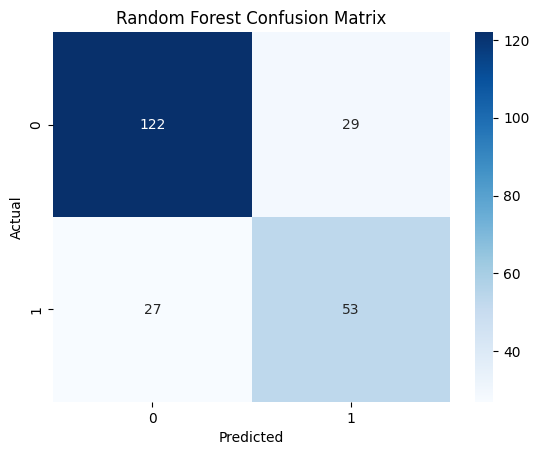

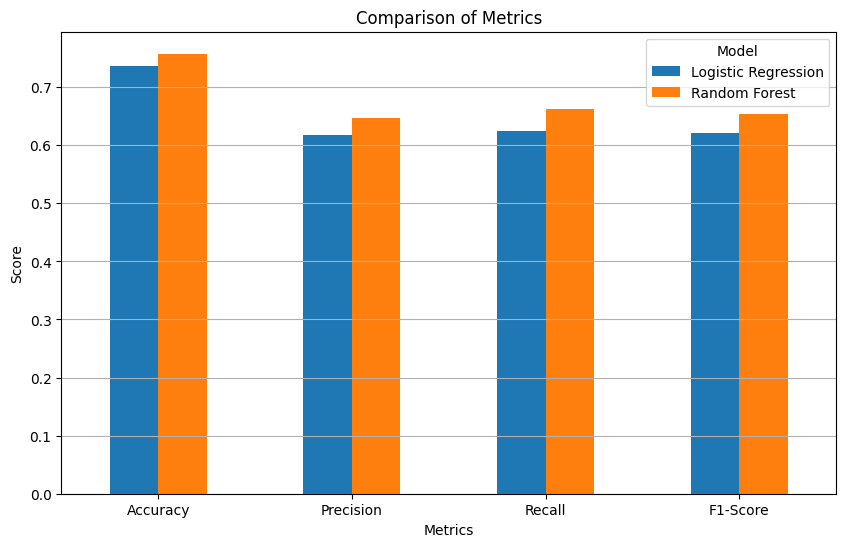

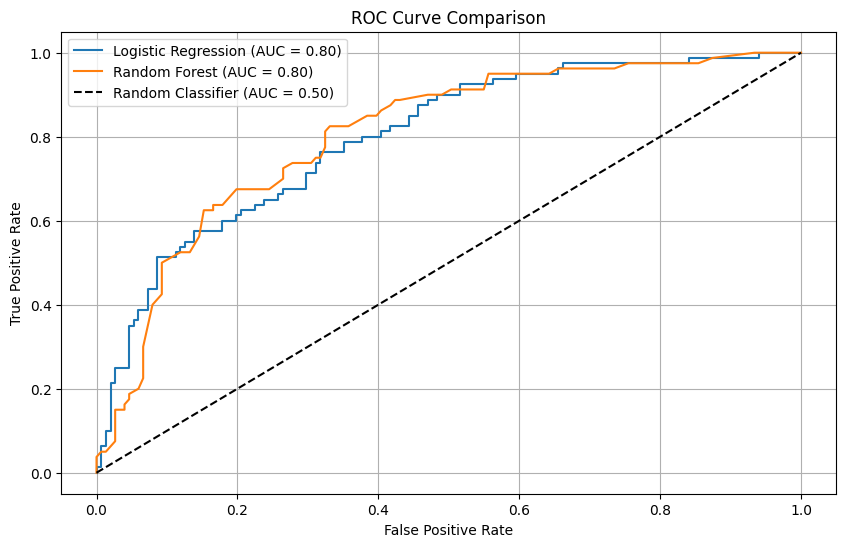

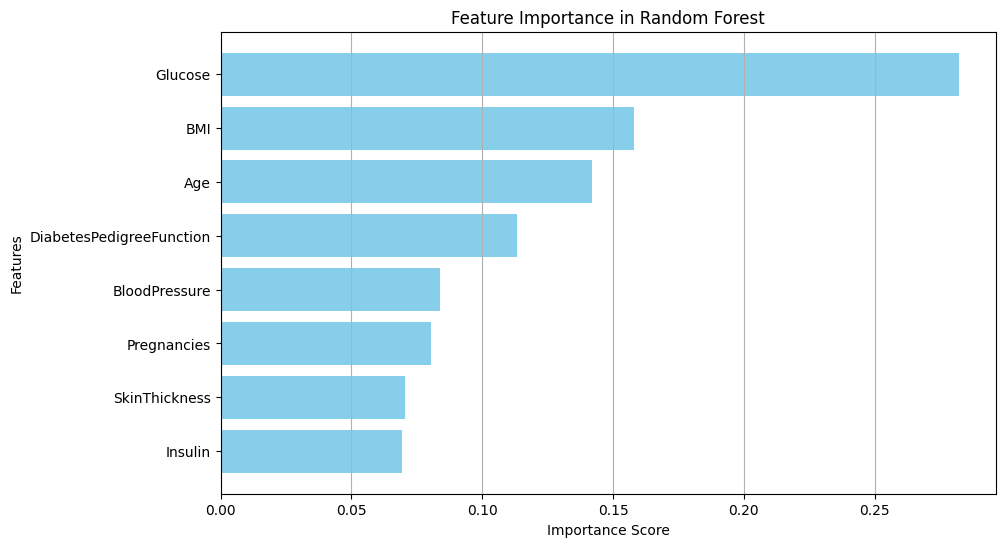

In [2]:
#run --> pip install pandas numpy scikit-learn matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# GitHub repository link placeholder
print("GitHub Repository Link: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv")

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)

# Dataset description
print("Dataset Overview:")
print(data.head())
print("\nDataset Information:")
print(data.info())
print("\nDataset Summary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values in Dataset:\n", data.isnull().sum())

# Define features and target variable
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features to standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} Evaluation ---")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Visualize Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Bar Chart for Metrics Comparison
def plot_metrics_comparison(y_test, y_pred_log, y_pred_rf):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    
    log_metrics = [
        accuracy_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_log),
    ]
    
    rf_metrics = [
        accuracy_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf),
    ]
    
    # Create DataFrame for visualization
    metrics_df = pd.DataFrame({'Metric': metrics, 'Logistic Regression': log_metrics, 'Random Forest': rf_metrics})
    metrics_df.set_index('Metric', inplace=True)
    metrics_df.plot(kind='bar', figsize=(10, 6))
    
    plt.title('Comparison of Metrics')
    plt.ylabel('Score')
    plt.xlabel('Metrics')
    plt.xticks(rotation=0)
    plt.legend(title="Model")
    plt.grid(axis='y')
    plt.show()

plot_metrics_comparison(y_test, y_pred_log, y_pred_rf)

# ROC Curve for both models
def plot_roc_curve(y_test, y_proba_log, y_proba_rf):
    fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log[:, 1])
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf[:, 1])
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_log[:, 1]):.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf[:, 1]):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
    
    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Get predicted probabilities for ROC Curve
y_proba_log = log_model.predict_proba(X_test)
y_proba_rf = rf_model.predict_proba(X_test)
plot_roc_curve(y_test, y_proba_log, y_proba_rf)

# Feature Importance for Random Forest
def plot_feature_importance(rf_model, feature_names):
    importance = rf_model.feature_importances_
    sorted_idx = np.argsort(importance)[::-1]
    sorted_importance = importance[sorted_idx]
    sorted_features = feature_names[sorted_idx]
    
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importance, color='skyblue')
    plt.title('Feature Importance in Random Forest')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.gca().invert_yaxis()
    plt.grid(axis='x')
    plt.show()

# Call the function
plot_feature_importance(rf_model, np.array(columns[:-1]))
